<p style = "color:gold; font-size:24px;font-weight:bold;">In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.</p>

<p style = "color:gold; font-size:24px;font-weight:bold;">Case Study - We are going to analyse and predict the monthly sales of a particular store. The data that we have ranges from 2013 to 2017.</p>

# Import the Libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
from IPython.display import display

# Load the Data

In [113]:
df = pd.read_csv('monthly sales.csv')

In [114]:
display(df.head())
display(df.tail())

,Month,Sales
0,Jan-13,454904
1,Feb-13,459417
2,Mar-13,617382
3,Apr-13,682274
4,May-13,763242


,Month,Sales
55,Aug-17,1026403
56,Sep-17,935263
57,Oct-17,891160
58,Nov-17,928837
59,Dec-17,695170


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [115]:
Date = pd.date_range(start='2013-01-01',periods=60, freq='M')
Date

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [117]:
df['Date'] = Date

In [118]:
df.drop('Month', axis=1, inplace=True)

In [119]:
df.set_index('Date', inplace=True)

In [120]:
df.head()

,Sales
Date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


In [121]:
df.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [122]:
df.index.freq = 'M'

In [123]:
df.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

Now, we have our data ready for the Time Series Analysis.

# Plot the Time Series 

In [124]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

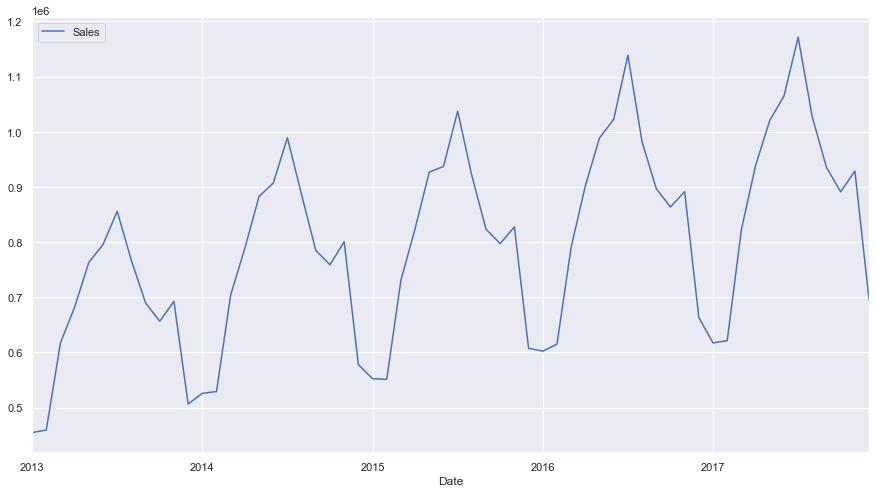

In [125]:
df.plot();

There seems to be a trend with a seasonality as well.

# Descriptive stats

In [126]:
round(df.describe(),0)

,Sales
count,60.0
mean,795075.0
std,172902.0
min,454904.0
25%,661705.0
50%,799018.0
75%,922026.0
max,1171393.0


# Boxplots to understand distribution

## Yearly Boxplot

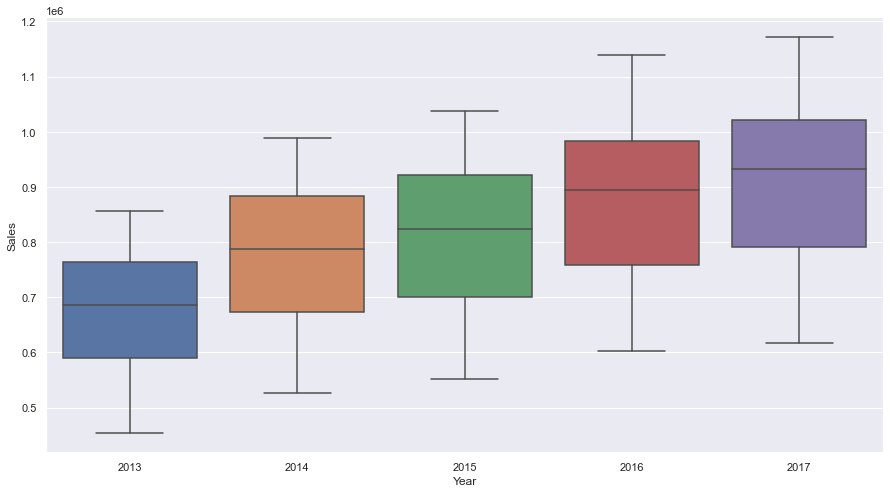

In [127]:
sns.boxplot(x=df.index.year, y = df['Sales'])
plt.xlabel('Year');

## Monthly Boxplot

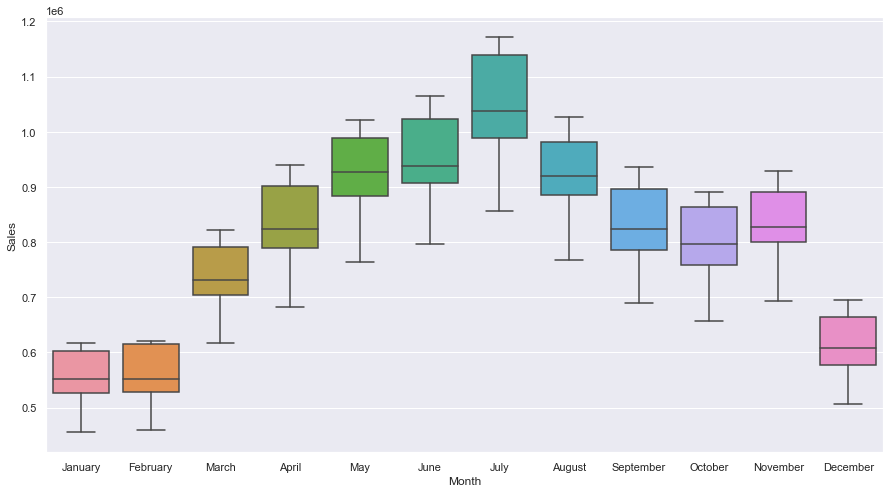

In [128]:
sns.boxplot(x=df.index.month_name(), y = df['Sales']);
plt.xlabel('Month');

We see that there is maximum sales in the month of July.

## Monthly sales across years for each month

In [129]:
from statsmodels.graphics.tsaplots import month_plot

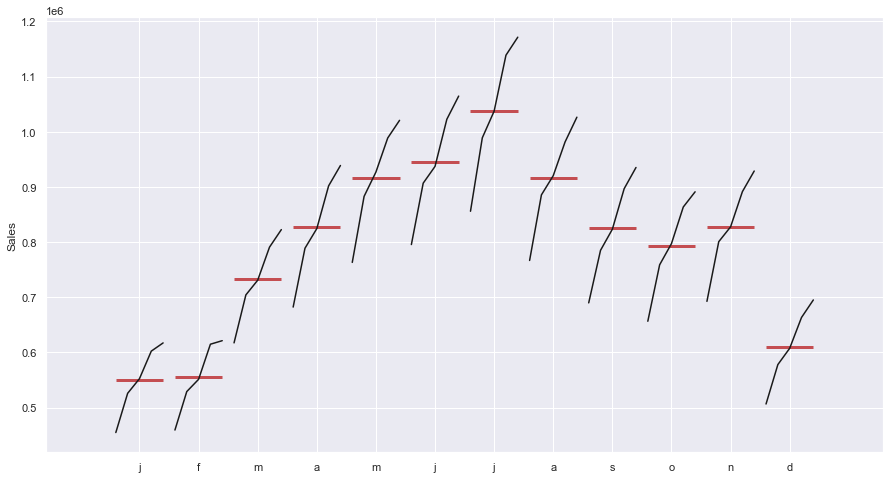

In [130]:
month_plot(df, ylabel='Sales');

From the graph also, we can conclude that July has the highest sales across years.

# Decompose the Time Series

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose

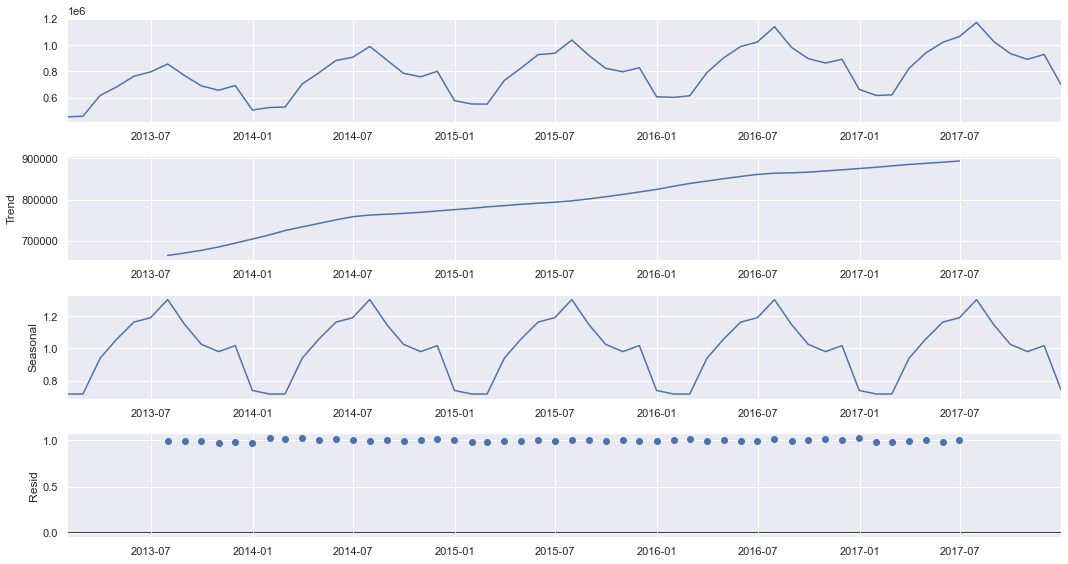

In [132]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [133]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2013-01-31              NaN
2013-02-28              NaN
2013-03-31              NaN
2013-04-30              NaN
2013-05-31              NaN
2013-06-30              NaN
2013-07-31    664732.041667
2013-08-31    670598.000000
2013-09-30    677123.791667
2013-10-31    685188.750000
2013-11-30    694616.875000
2013-12-31    704236.875000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
2013-01-31    0.718566
2013-02-28    0.718591
2013-03-31    0.939727
2013-04-30    1.057405
2013-05-31    1.162961
2013-06-30    1.189905
2013-07-31    1.301998
2013-08-31    1.146979
2013-09-30    1.025370
2013-10-31    0.980572
2013-11-30    1.017522
2013-12-31    0.740405
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
2013-01-31         NaN
2013-02-28         NaN
2013-03-31         NaN
2013-04-30         NaN
2013-05-31         NaN
2013-06-30         NaN
2013-07-31    0.988957
2013-08-31    0.996879
2013-09-30    0.993670
2013-10-31    0.977243
2013-11-30    0.979987
2013-1

# Train - Test Split & Plot

In [134]:
train = df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

In [135]:
train.shape, test.shape

((42, 1), (18, 1))

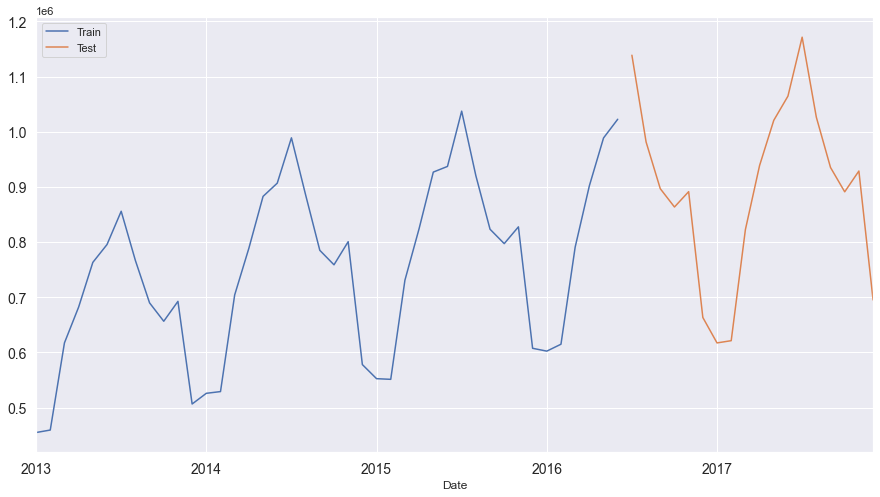

In [136]:
train['Sales'].plot(legend = True, label = 'Train', fontsize =14)
test['Sales'].plot(legend = True,label = 'Test', fontsize = 14);

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [137]:
train_time = [i+1 for i in range(len(train))] # 1 to 42
test_time = [i+43 for i in range(len(test))] # 43 to 60
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [138]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [139]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [140]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

,Sales,time
Date,,
2013-01-31,454904,1
2013-02-28,459417,2
2013-03-31,617382,3
2013-04-30,682274,4
2013-05-31,763242,5


,Sales,time
Date,,
2016-02-29,614957,38
2016-03-31,790881,39
2016-04-30,901950,40
2016-05-31,988730,41
2016-06-30,1022664,42


In [141]:
LinearRegression_test # 18 months data

,Sales,time
Date,,
2016-07-31,1138718,43
2016-08-31,981494,44
2016-09-30,896831,45
2016-10-31,863637,46
2016-11-30,891448,47
2016-12-31,663411,48
2017-01-31,617306,49
2017-02-28,621369,50
2017-03-31,822667,51


Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lr = LinearRegression()

In [144]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales']) 

LinearRegression()

In [145]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [147]:
LinearRegression_test.head(12)

,Sales,time,RegOnTime
Date,,,
2016-07-31,1138718,43,871535.255517
2016-08-31,981494,44,877149.040380
2016-09-30,896831,45,882762.825244
2016-10-31,863637,46,888376.610107
2016-11-30,891448,47,893990.394971
2016-12-31,663411,48,899604.179834
2017-01-31,617306,49,905217.964698
2017-02-28,621369,50,910831.749561
2017-03-31,822667,51,916445.534425


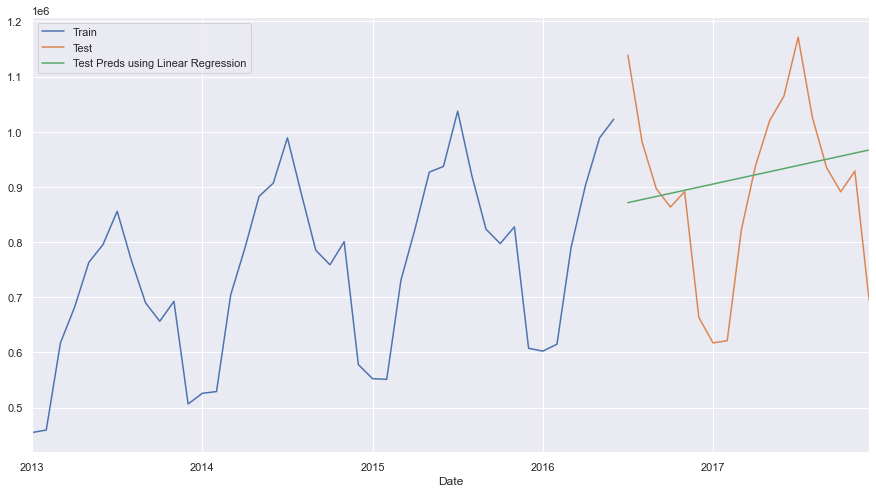

In [148]:
train['Sales'].plot(legend = True, label = 'Train')
test['Sales'].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, 
                                        label = 'Test Preds using Linear Regression');

### Accuracy metrics

In [149]:
# from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse #sklearn.metrics mse, np.sqrt, mse(squared = False)

### Model Evaluation

In [150]:
## Test Data - RMSE

rmse_model1_test = rmse(test['Sales'],test_predictions_model1)
rmse_model1_test

163404.81749425217

In [151]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},
                         index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [152]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [153]:
NaiveModel_test['naive'] = train['Sales'][len(train['Sales'])-1]

In [154]:
NaiveModel_test['naive'].head()

Date
2016-07-31    1022664
2016-08-31    1022664
2016-09-30    1022664
2016-10-31    1022664
2016-11-30    1022664
Freq: M, Name: naive, dtype: int64

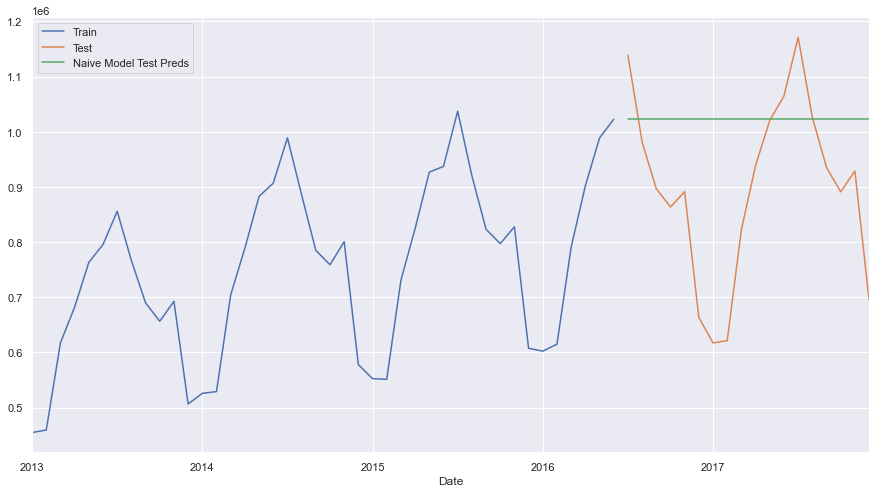

In [155]:
train['Sales'].plot(legend = True, label = 'Train')
test['Sales'].plot(legend = True, label = 'Test')
NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds');

### Model Evaluation

In [156]:
## Test Data - RMSE

rmse_model2_test=rmse(test['Sales'],NaiveModel_test['naive'])
rmse_model2_test

202735.2762058882

In [157]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206


## Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [158]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [159]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Sales,mean_forecast
Date,,
2016-07-31,1138718,750838.880952
2016-08-31,981494,750838.880952
2016-09-30,896831,750838.880952
2016-10-31,863637,750838.880952
2016-11-30,891448,750838.880952


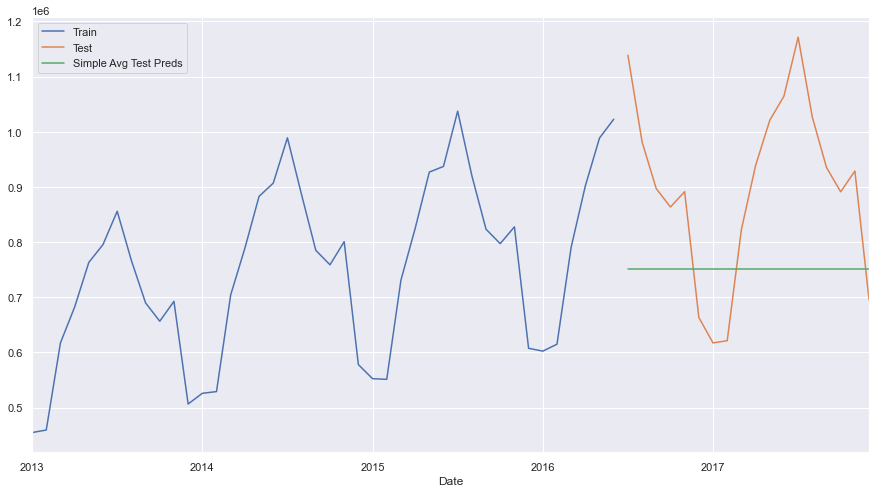

In [160]:
train['Sales'].plot(legend = True, label = 'Train')
test['Sales'].plot(legend = True, label = 'Test')
SimpleAverage_test['mean_forecast'].plot(legend=True,label= 'Simple Avg Test Preds');

### Model Evaluation

In [161]:
## Test Data - RMSE 

rmse_model3_test = rmse(test['Sales'], SimpleAverage_test['mean_forecast'])
rmse_model3_test

217661.00894588864

In [162]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946


## Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [164]:
MovingAverage = df.copy()
MovingAverage.head()

,Sales
Date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


### Trailing moving averages

In [165]:

MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head(10)

,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
2013-01-31,454904,NaN,NaN,NaN,NaN
2013-02-28,459417,457160.5,NaN,NaN,NaN
2013-03-31,617382,538399.5,NaN,NaN,NaN
2013-04-30,682274,649828.0,553494.25,NaN,NaN
2013-05-31,763242,722758.0,630578.75,NaN,NaN
2013-06-30,795597,779419.5,714623.75,628802.666667,NaN
2013-07-31,855922,825759.5,774258.75,695639.000000,NaN
2013-08-31,766761,811341.5,795380.50,746863.000000,NaN
2013-09-30,689907,728334.0,777046.75,758950.500000,676156.222222


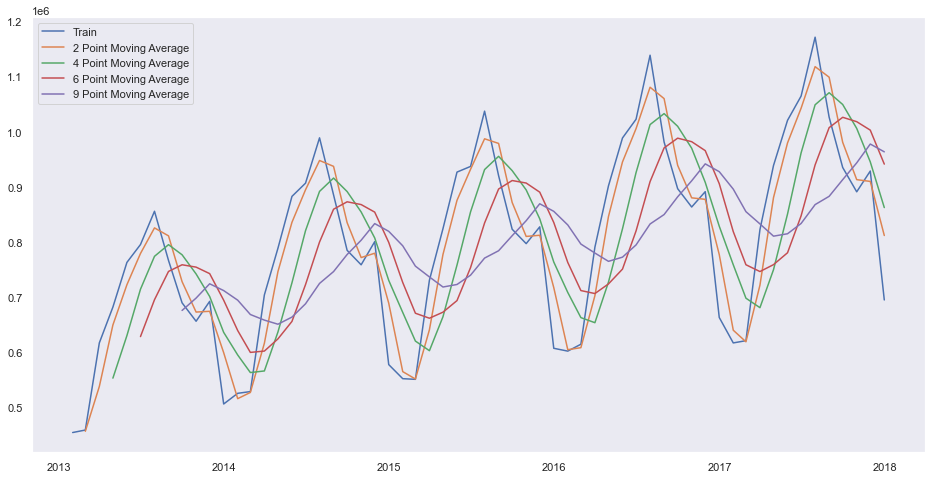

In [166]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. 

In [167]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

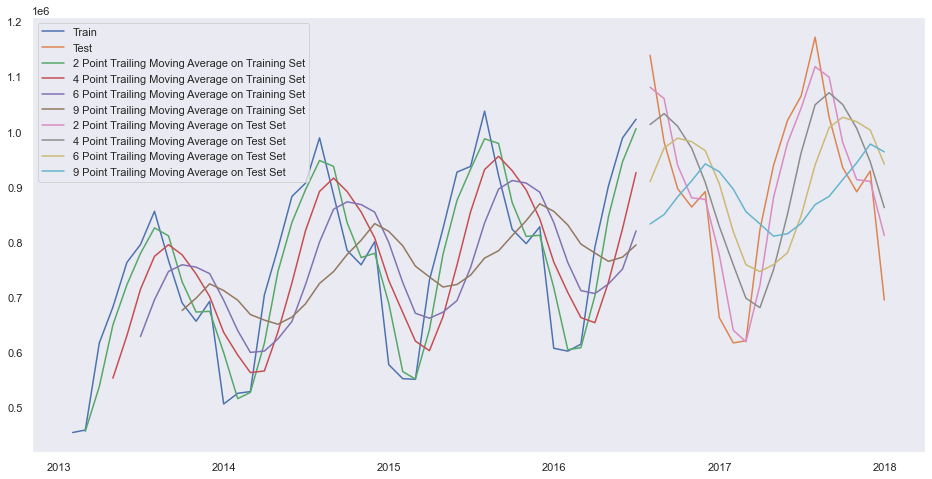

In [168]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [169]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = rmse(test['Sales'],
                          trailing_MovingAverage_test['Trailing_2'])
rmse_model4_test_2

60405.46803316365

In [170]:
## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = rmse(test['Sales'],trailing_MovingAverage_test['Trailing_4'])
rmse_model4_test_4

120837.91554811713

In [171]:
## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = rmse(test['Sales'],trailing_MovingAverage_test['Trailing_6'])
rmse_model4_test_6

164346.87026300144

In [172]:
## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = rmse(test['Sales'],trailing_MovingAverage_test['Trailing_9'])
rmse_model4_test_9

185658.32756309843

In [173]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4,rmse_model4_test_6, rmse_model4_test_9]}, index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

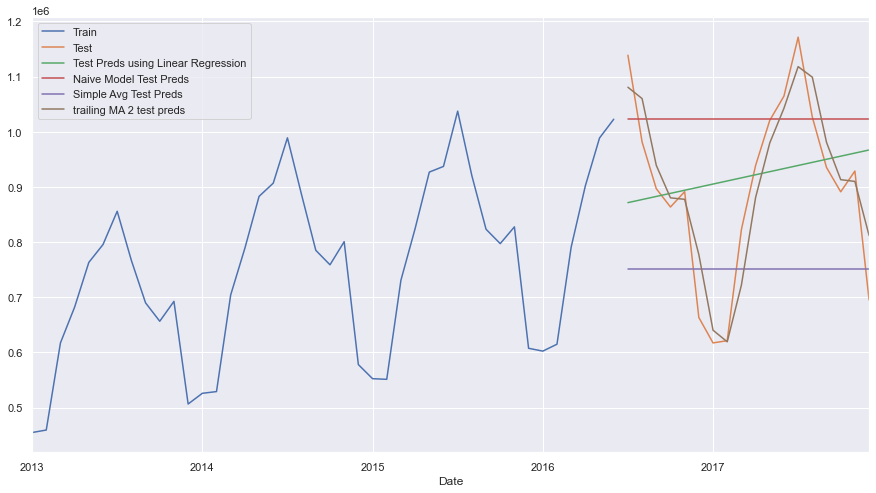

In [174]:
train['Sales'].plot(legend = True, label = 'Train')

test['Sales'].plot(legend = True, label = 'Test')

LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')

NaiveModel_test['naive'].plot(legend = True, label = 'Naive Model Test Preds')

SimpleAverage_test['mean_forecast'].plot(legend=True,
                                         label= 'Simple Avg Test Preds')

trailing_MovingAverage_test['Trailing_2'].plot(legend=True,
                                              label ='trailing MA 2 test preds');

## Method 5: Simple Exponential Smoothing

In [175]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [176]:
SES_train = train.copy()
SES_test = test.copy()

In [177]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [178]:
model_SES_autofit = model_SES.fit()

In [179]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 454904.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [180]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head().style

,Sales,predict
Date,,
2016-07-31 00:00:00,1138718,1022492.146506
2016-08-31 00:00:00,981494,1022492.146506
2016-09-30 00:00:00,896831,1022492.146506
2016-10-31 00:00:00,863637,1022492.146506
2016-11-30 00:00:00,891448,1022492.146506


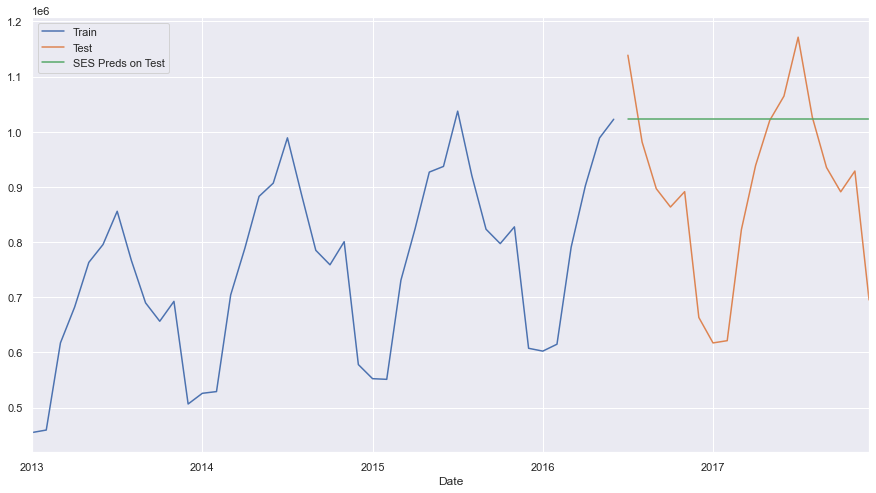

In [181]:
SES_train['Sales'].plot(legend=True, label = 'Train')
SES_test['Sales'].plot(legend=True, label = 'Test')
SES_test['predict'].plot(legend=True, label = 'SES Preds on Test');

### Model Evaluation for  Simple Exponential Smoothing

In [182]:
## Test Data

rmse_model5_test_1 = rmse(SES_test['Sales'],SES_test['predict'])
rmse_model5_test_1

202629.8957845709

In [183]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785


Setting different alpha values:

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [184]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [185]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9] # np.arange(0.3,1.0,0.1) ---> 0.70000000000002, 0.800000003

In [186]:
for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = rmse(SES_train['Sales'],SES_train['predict',i])
    
    rmse_model5_test_i = rmse(SES_test['Sales'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,
                                      'Train RMSE': rmse_model5_train_i,'Test RMSE':rmse_model5_test_i}, 
                                     ignore_index=True)

In [187]:
SES_test.head().style

,Sales,predict,"('predict', 0.3)","('predict', 0.4)","('predict', 0.5)","('predict', 0.6)","('predict', 0.7)","('predict', 0.8)","('predict', 0.9)"
Date,,,,,,,,,
2016-07-31 00:00:00,1138718,1022492.146506,894117.195570,930072.812733,960578.550922,983846.745933,1000270.443581,1011235.056731,1018274.040293
2016-08-31 00:00:00,981494,1022492.146506,894117.195570,930072.812733,960578.550922,983846.745933,1000270.443581,1011235.056731,1018274.040293
2016-09-30 00:00:00,896831,1022492.146506,894117.195570,930072.812733,960578.550922,983846.745933,1000270.443581,1011235.056731,1018274.040293
2016-10-31 00:00:00,863637,1022492.146506,894117.195570,930072.812733,960578.550922,983846.745933,1000270.443581,1011235.056731,1018274.040293
2016-11-30 00:00:00,891448,1022492.146506,894117.195570,930072.812733,960578.550922,983846.745933,1000270.443581,1011235.056731,1018274.040293


### Model Evaluation

In [189]:
resultsDf_6.head(10)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,142953.215856,160159.156263
1,0.4,135096.079360,163228.228301
2,0.5,126505.537970,171793.396040
3,0.6,118395.454222,181529.368383
4,0.7,111396.231534,189823.228340
5,0.8,105720.206826,195932.031851
6,0.9,101377.703489,200072.234570


In [190]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,142953.215856,160159.156263
1,0.4,135096.079360,163228.228301
2,0.5,126505.537970,171793.396040
3,0.6,118395.454222,181529.368383
4,0.7,111396.231534,189823.228340
5,0.8,105720.206826,195932.031851
6,0.9,101377.703489,200072.234570


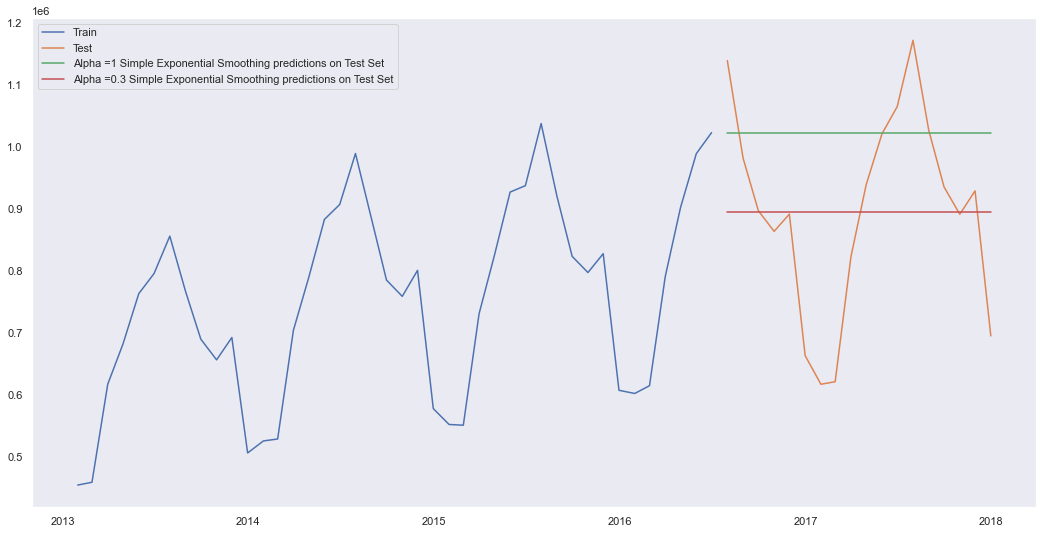

In [191]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [192]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],
 ascending=True).values[0][2]]},index = ['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.156263


## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [193]:
DES_train = train.copy()
DES_test = test.copy()

In [194]:
model_DES = Holt(DES_train['Sales'])

### Identifying Optimum Values of $\alpha$ & $\beta$

In [195]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [196]:
alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [197]:
for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = rmse(DES_train['Sales'],DES_train['predict',i,j])
        
        rmse_model6_test = rmse(DES_test['Sales'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,
                                          'Beta Values':j,
                                          'Train RMSE': rmse_model6_train,
                                          'Test RMSE': rmse_model6_test}, ignore_index=True)

In [198]:
resultsDf_7.style

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.300000,0.300000,178123.117409,397600.562933
1,0.300000,0.400000,191807.998264,590797.571671
2,0.300000,0.500000,203648.014287,863283.142977
3,0.300000,0.600000,211220.082501,1214100.428634
4,0.300000,0.700000,212877.147892,1590702.597836
5,0.300000,0.800000,208779.433630,1906477.724356
6,0.300000,0.900000,200523.058918,2098074.076443
7,0.300000,1.000000,190039.876371,2154632.397459
8,0.400000,0.300000,164709.474785,621963.225093
9,0.400000,0.400000,171151.160709,909819.559654


Let us sort the data frame in the ascending ordering of the 'Test RMSE'.

In [199]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,178123.117409,397600.562933
63,1.0,1.0,120807.097109,504855.422747
55,0.9,1.0,111959.503959,520333.167825
47,0.8,1.0,108932.300292,540693.812056
62,1.0,0.9,115747.161707,561974.382967


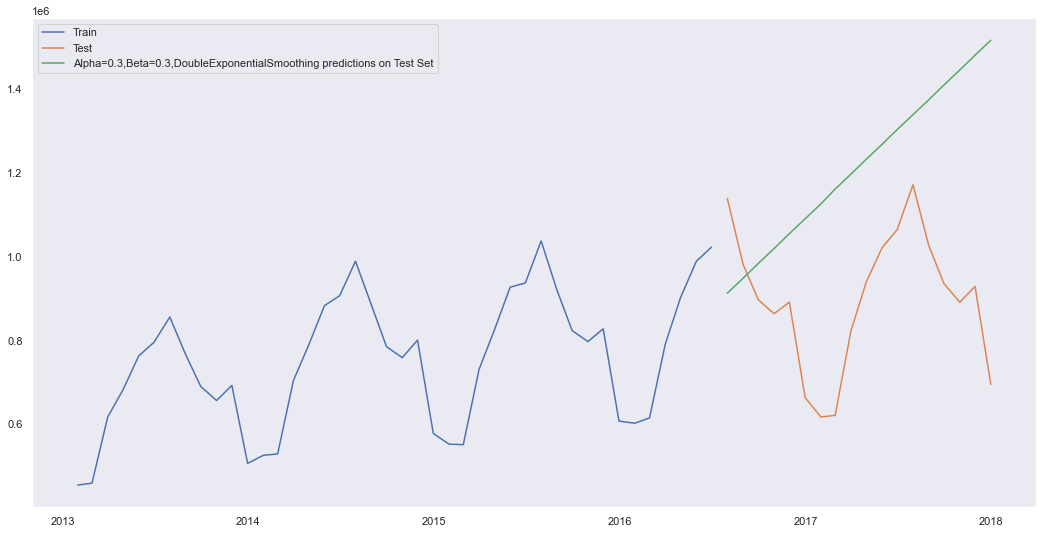

In [200]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3],
         label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [201]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.156263
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397600.562933


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [202]:
TES_train = train.copy()
TES_test = test.copy()

In [203]:
model_TES = ExponentialSmoothing(TES_train['Sales'],
                                 trend='additive',
                                 seasonal='multiplicative',freq='M')

In [204]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [205]:
model_TES_autofit.params

{'smoothing_level': 0.6767857142857143,
 'smoothing_trend': 0.08827639751552795,
 'smoothing_seasonal': 0.3232142857142857,
 'damping_trend': nan,
 'initial_level': 533960.75,
 'initial_trend': 8293.326388888889,
 'initial_seasons': array([0.85194277, 0.8603947 , 1.15623105, 1.27776058, 1.4293972 ,
        1.48999154, 1.60296801, 1.43598757, 1.29205564, 1.22965405,
        1.29717961, 0.94877198]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [206]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test)).round(0)

TES_test.head()

,Sales,auto_predict
Date,,
2016-07-31,1138718,1131607.0
2016-08-31,981494,1013667.0
2016-09-30,896831,914717.0
2016-10-31,863637,887392.0
2016-11-30,891448,934977.0


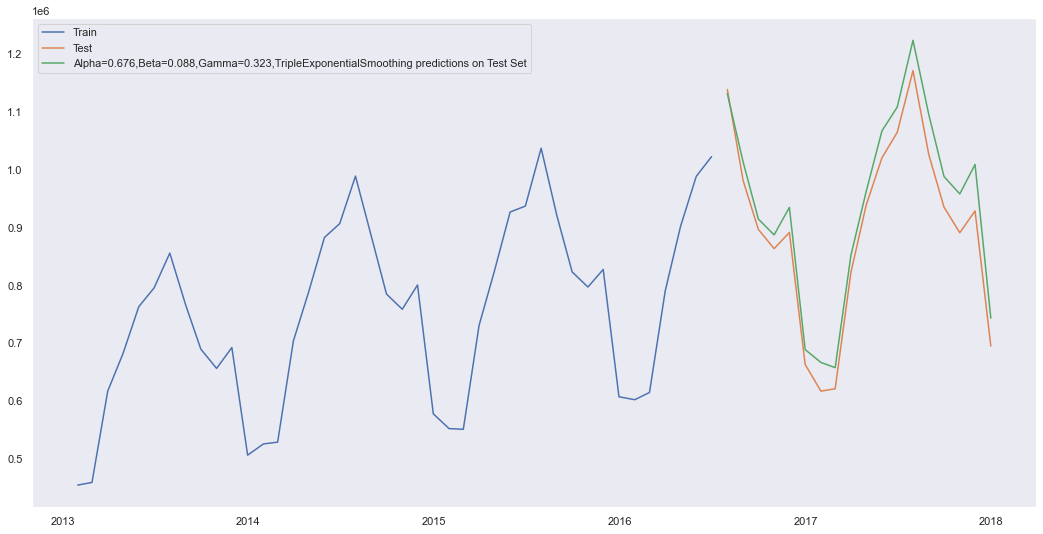

In [207]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [208]:
## Test Data

rmse_model6_test_1 = rmse(TES_test['Sales'],
                          TES_test['auto_predict'])
rmse_model6_test_1

45618.092129719276

In [209]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.156263
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397600.562933


### Identifying Optimum Values of $\alpha$, $\beta$ and $\gamma$

In [210]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [211]:
gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [212]:
for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = rmse(TES_train['Sales'],
                                     TES_train['predict',i,j,k])
            
            rmse_model8_test = rmse(TES_test['Sales'],
                                    TES_test['predict',i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test},ignore_index=True)

In [213]:
TES_test.head().style

In [214]:
resultsDf_8_2.style

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.300000,0.300000,0.300000,23823.948100,63741.968403
1,0.300000,0.300000,0.400000,24868.831584,54293.044197
2,0.300000,0.300000,0.500000,26437.491710,41350.587693
3,0.300000,0.300000,0.600000,28448.180619,29312.430893
4,0.300000,0.300000,0.700000,30844.551886,33034.845757
5,0.300000,0.300000,0.800000,33599.563884,57276.942843
6,0.300000,0.300000,0.900000,36714.321716,92010.871144
7,0.300000,0.300000,1.000000,40215.229084,133518.746433
8,0.300000,0.400000,0.300000,193665395.154248,191371155.601211
9,0.300000,0.400000,0.400000,27220.890540,85836.938478


In [215]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
480,1.0,0.7,0.3,24226.110748,16412.236378
456,1.0,0.4,0.3,20171.400797,17131.789546
264,0.7,0.4,0.3,19308.951283,19328.851212
393,0.9,0.4,0.4,19364.702720,19368.123096
465,1.0,0.5,0.4,21651.835635,19690.325881


In [ ]:
# TES_test.head()

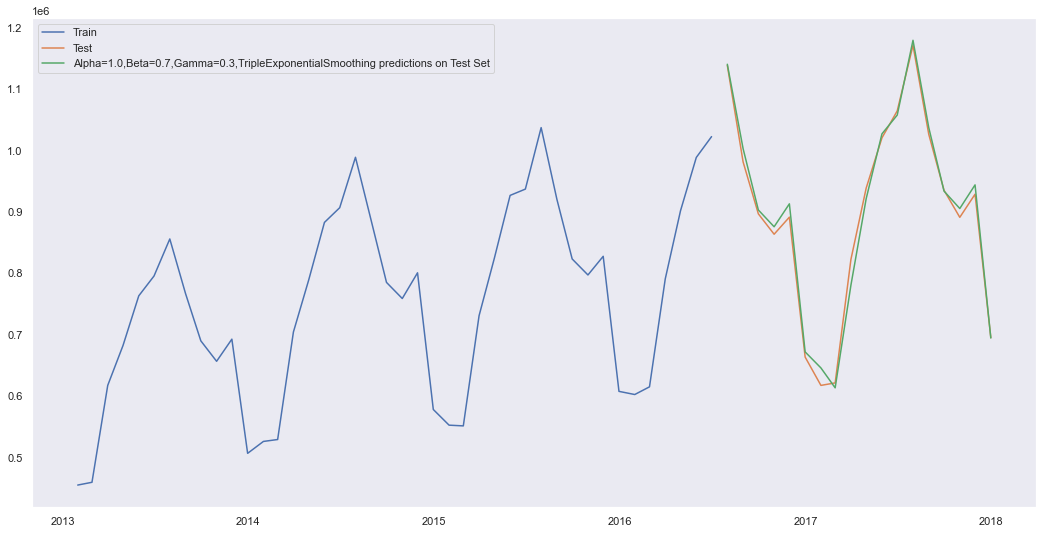

In [216]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 1.0, 0.7, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [217]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,163404.817494
NaiveModel,202735.276206
SimpleAverageModel,217661.008946
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
"Alpha=0.3,SimpleExponentialSmoothing",160159.156263
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397600.562933


In [218]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing",16412.236378
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",45618.092130
2pointTrailingMovingAverage,60405.468033
4pointTrailingMovingAverage,120837.915548
"Alpha=0.3,SimpleExponentialSmoothing",160159.156263
RegressionOnTime,163404.817494
6pointTrailingMovingAverage,164346.870263
9pointTrailingMovingAverage,185658.327563
"Alpha=0.995,SimpleExponentialSmoothing",202629.895785
NaiveModel,202735.276206


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 1.0, $\beta$ = 0.7 and $\gamma$ = 0.3.

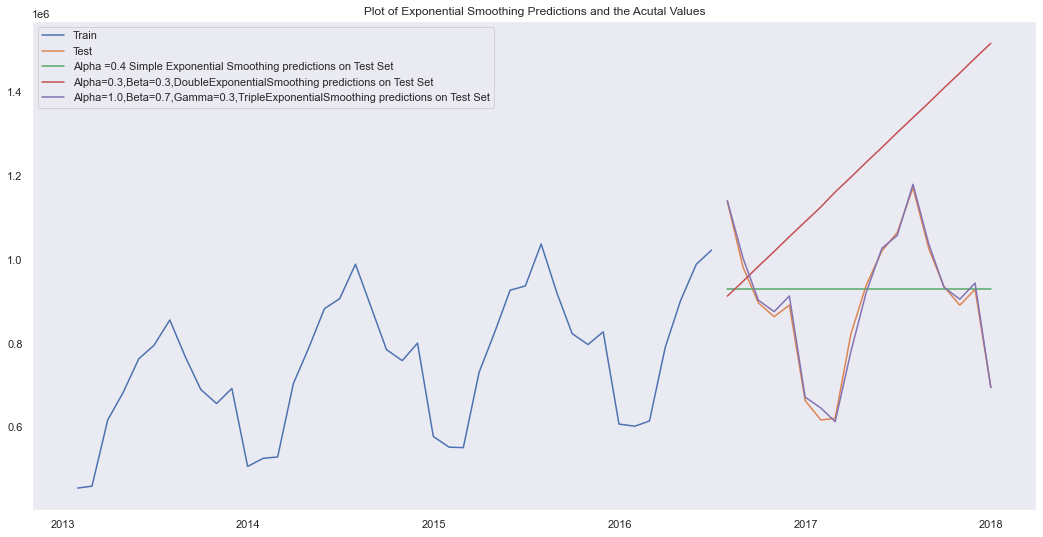

In [219]:
## Plotting on both the Training and Test data and comparing the 3 exponential models

plt.figure(figsize=(18,9))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 1.0, 0.7, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

### Training the Model on the Full Data

In this particular session, we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to remember the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top  model which gave us the best accuracy (least RMSE). As a practice you can try the second best TES model as well.

The models to be built on the whole data are the following:

* Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing	

In [220]:
fullmodel1 = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative')
fullmodel1= fullmodel1.fit(smoothing_level=1.0, smoothing_trend=0.7, smoothing_seasonal=0.3)

In [221]:
RMSE_fullmodel1 = rmse(df['Sales'],
                       fullmodel1.fittedvalues)

RMSE_fullmodel1

24016.343558358796

In [222]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

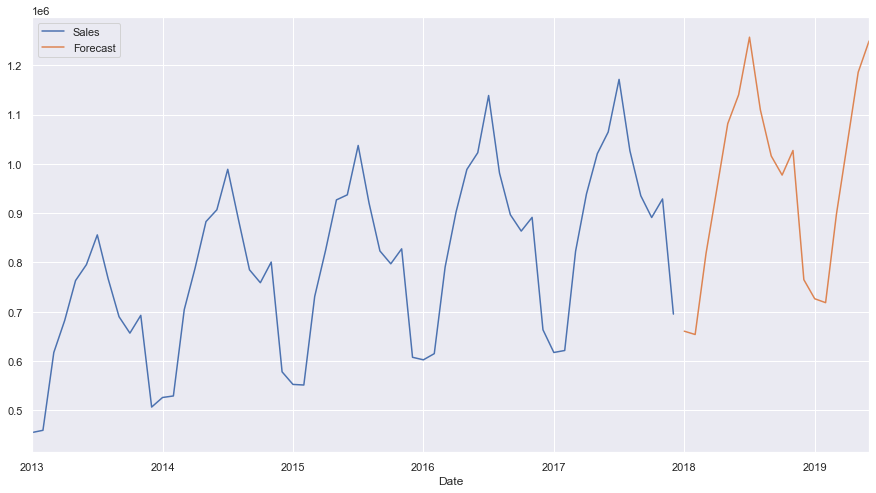

In [223]:
df.plot(legend  = True, label = 'Actual')
prediction_1.plot(legend = True, label = 'Forecast');

## Prediction Confidence Intervals : Margin of Error 

One assumption that we will make over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [224]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level.Here we are taking the multiplier to be 1.96 since in a normal distribution( as the residual should be if you have done the modelling properly,), 95% of values lie within +/- 1.96 sigma of the mean

pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*fullmodel1.resid.std(),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*fullmodel1.resid.std()})
pred_1_df.head().style

,lower_CI,prediction,upper_ci
2018-01-31 00:00:00,613086.100360,660525.055637,707964.010913
2018-02-28 00:00:00,606362.159089,653801.114365,701240.069642
2018-03-31 00:00:00,770654.053928,818093.009205,865531.964481
2018-04-30 00:00:00,901990.766556,949429.721833,996868.677109
2018-05-31 00:00:00,1034224.231904,1081663.187181,1129102.142457


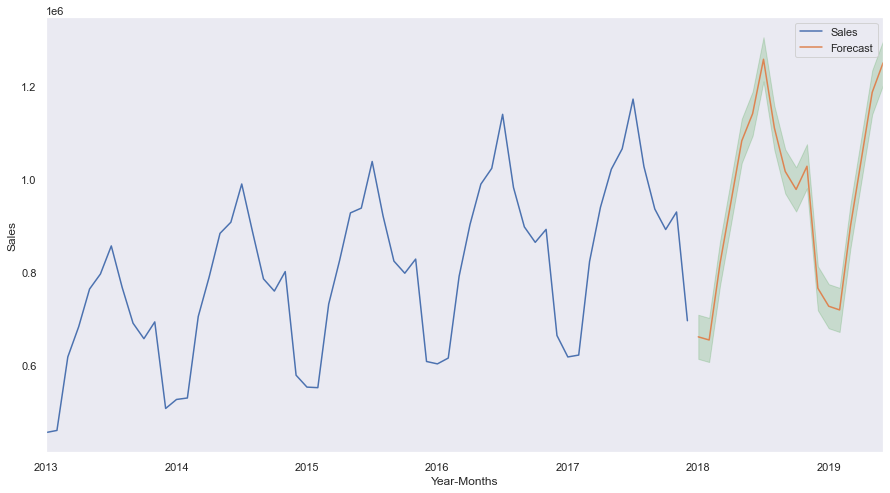

In [225]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=1) # alpha here is for transparency of the prediction line

axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='green', alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show();

# END